In [1]:
from dcicutils import ff_utils
from functions.notebook_functions import *
from functions.wfr import *

# get key from keypairs.json
my_key = get_key('koray_data')

url = "/search/?experimentset_type=replicate&type=ExperimentSetReplicate&experiments_in_set.experiment_type=SPT"
spt_exps = ff_utils.search_metadata(url, key=my_key)
print(len(spt_exps))

60


In [3]:
desc = [spt['description'] for spt in spt_exps]
print(len(desc))
print(len(list(set(desc))))

60
60


In [24]:
#!pip install nltk
import nltk
import numpy as np
result_array = np.empty((0, len(desc)))

    
for i in desc:
    scores = []
    for r in desc:
        score = nltk.edit_distance(i, r)
        scores.append(score)
    result_array = np.append(result_array, [scores], axis = 0)

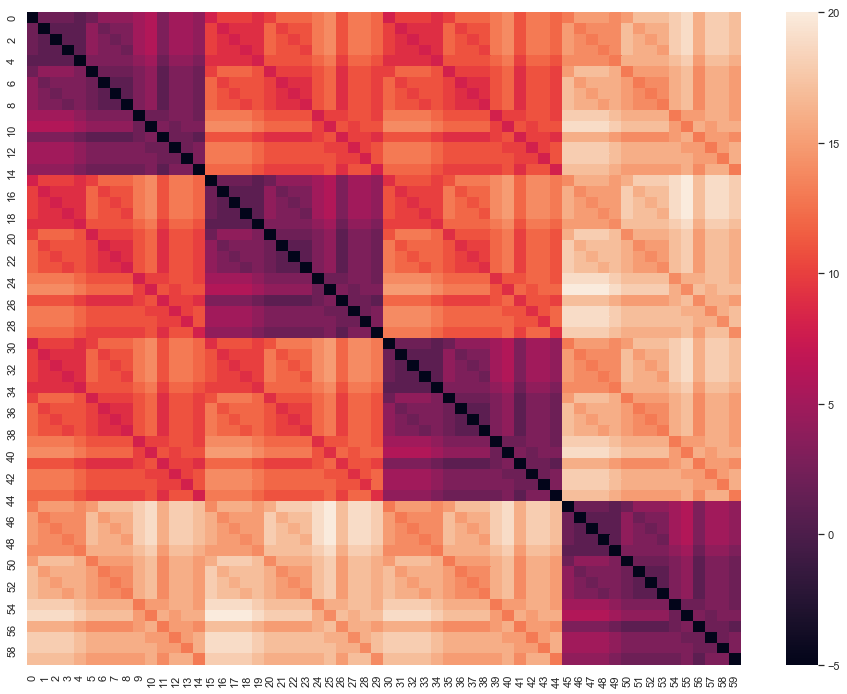

In [28]:
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns; sns.set()

#set 0 to -5 to see exact matches (expect to see only diagonal)
result_array[result_array==0] = -5

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 12)
sns.heatmap(result_array, ax=ax)